# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
import torch

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='./Reacher_Windows_x86_64_1_agent/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
i = 0
while i<200:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    i += 1
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.0


When finished, you can close the environment.

### 4. Training the agent

Now it's time to train the agent to solve the environment!  When training the environment, it is set to `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [29]:
from ddpg_agent_v2 import Agent
import random

# parameters for the agent
f = 10
lr = 3e-4
lra = 1e-4

agent = Agent(state_size = states.shape[1], action_size = brain.vector_action_space_size, random_seed = 2, learning_frequency = f, lr_actor = lra, lr_critic = lr, weight_decay = 0)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

Actor v2
Actor v2
cuda:0


In [30]:
def ddpg_train(max_episodes = 100, max_time_steps = 100, trial = 0, timer_widget = None):
    scores_deque = deque(maxlen=100)
    scores = []
    current_episode_score = 0
    mean_score_deque = 0
    max_score = -np.inf
    reset_noise_t = 10000  # reset noise every N steps
    env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
    states = env_info.vector_observations                 # get the current state (for each agent)
    steps = 0
    flag_solved = False
    print("Training start")
    for episode in range(max_episodes):
        score = np.zeros(num_agents) 
        agent.reset()                            # reset OU noise at the start of the episode
        
        if steps % 2000 == 0:                # do hard update every 2000 gradient steps
            agent.soft_update(agent.critic_local, agent.critic_target, 1.0)
            agent.soft_update(agent.actor_local, agent.actor_target, 1.0)
        
        for t in range(max_time_steps):
            
            if t%reset_noise_t == 0:
                agent.reset()
                    
            actions = agent.act(states)                           # agent actions
            env_info = env.step(actions)[brain_name]              # send actions to the environment
            
            # get environment feedback and reward
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            rewards = [0.1 if rew > 0 else 0 for rew in rewards]
            dones = env_info.local_done
            
            # store in replay buffer and learn if buffer large enough
            agent.step(states, actions, rewards, next_states, dones)
            
            states = next_states
            score += rewards
            steps += 1
            if np.any(dones):
                break 
        scores_deque.append(score)
        scores.append(score)

        current_episode_score = np.mean(score)
        mean_score_deque = np.mean(scores_deque)
        
        if current_episode_score > max_score:
            max_score = current_episode_score
        
        # if the past 100 scores is above the 30.0 mark and this is the first time it is seen
        if mean_score_deque > 30.0 and flag_solved == False:
            print('Problem solved in {} episodes, average score over past 100 episodes: {:.2f}'.format(episode, mean_score_deque))
            flag_solved = True

        if episode % 25 == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor{}.pth'.format(trial))
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic{}.pth'.format(trial))
            print('\rEpisode {}\tAverage Score: {:.2f}\tEpisode Score: {:.2f}\tBest Score: {:.2f}'.format(episode, mean_score_deque, current_episode_score, max_score))
            # update progress widget bar if widget object provided
            if timer_widget != None:
                timer_widget.update(episode+1)
        else:
            print('\rEpisode {}\tAverage Score: {:.2f}\tBest Score: {:.2f}'.format(episode, mean_score_deque, max_score), end="")

    torch.save(agent.actor_local.state_dict(), 'checkpoint_actor{}.pth'.format(trial))
    torch.save(agent.critic_local.state_dict(), 'checkpoint_critic{}.pth'.format(trial))
    print('\rEpisode {}\tAverage Score: {:.2f}\tEpisode Score: {}\tBest Score: {:.2f}'.format(episode, mean_score_deque, current_episode_score, max_score))
    return scores

In [31]:
max_episodes = 1000

# widget bar to display progress
import progressbar as pb
widget = ['training loop: ', pb.Percentage(), ' ', 
          pb.Bar(), ' ', pb.ETA() ]
timer = pb.ProgressBar(widgets=widget, maxval=max_episodes).start()

# extension name of the checkpoint
trial = "_Model_actor128-128_critic256-256_f10_cLR3e-4_aLR1e-4_GAE-0.0"

s = ddpg_train(max_episodes = max_episodes, max_time_steps = 1000, trial = trial, timer_widget = timer)
         
#print average over last 50 episodes
print("update every {} steps, critic LR = {}, actor LR = {}. Average score over last 50 episodes = {:.2f}".format(f, lr, lra, np.mean(s[-50:])))
                
timer.finish()

Training start


Episode 0	Average Score: 2.80	Episode Score: 2.80	Best Score: 2.80
Episode 23	Average Score: 1.10	Best Score: 7.20

Episode 25	Average Score: 1.14	Episode Score: 0.00	Best Score: 7.20
Episode 49	Average Score: 1.31	Best Score: 7.20

Episode 50	Average Score: 1.37	Episode Score: 4.20	Best Score: 7.20
Episode 73	Average Score: 1.96	Best Score: 16.70

Episode 75	Average Score: 2.06	Episode Score: 0.00	Best Score: 16.70
Episode 99	Average Score: 2.12	Best Score: 16.70

Episode 100	Average Score: 2.17	Episode Score: 7.70	Best Score: 16.70
Episode 123	Average Score: 3.08	Best Score: 17.40

Episode 125	Average Score: 3.22	Episode Score: 0.00	Best Score: 17.40
Episode 149	Average Score: 4.57	Best Score: 33.00

Episode 150	Average Score: 4.69	Episode Score: 16.50	Best Score: 33.00
Episode 173	Average Score: 5.42	Best Score: 33.00

Episode 175	Average Score: 5.37	Episode Score: 0.10	Best Score: 33.00
Episode 199	Average Score: 7.52	Best Score: 74.00

Episode 200	Average Score: 7.85	Episode Score: 41.00	Best Score: 74.00
Episode 223	Average Score: 10.18	Best Score: 74.00

Episode 225	Average Score: 10.36	Episode Score: 0.10	Best Score: 74.00
Episode 249	Average Score: 13.06	Best Score: 76.50

Episode 250	Average Score: 13.35	Episode Score: 45.70	Best Score: 76.50
Episode 273	Average Score: 18.35	Best Score: 76.50

Episode 275	Average Score: 18.75	Episode Score: 0.00	Best Score: 76.50
Episode 299	Average Score: 22.53	Best Score: 92.10

Episode 300	Average Score: 22.94	Episode Score: 82.20	Best Score: 92.10
Episode 323	Average Score: 26.71	Best Score: 97.30

Episode 325	Average Score: 26.87	Episode Score: 0.10	Best Score: 97.30
Episode 333	Average Score: 29.59	Best Score: 98.60Problem solved in 334 episodes, average score over past 100 episodes: 30.05
Episode 334	Average Score: 30.05	Best Score: 98.60Problem solved in 335 episodes, average score over past 100 episodes: 30.05
Episode 335	Average Score: 30.05	Best Score: 98.60Problem solved in 336 episodes, average score over past 100 episodes: 30.45
Episode 336	Average Score: 30.45	Best Score: 98.60Problem solved in 337 episodes, average score over past 100 episodes: 30.45
Episode 337	Average Score: 30.45	Best Score: 98.60Problem solved in 338 episodes, average score over past 100 episodes: 30.45
Episode 338	Average Score: 30.45	Best Score: 98.60Problem solved in 339 episodes, average score over past 100 episodes: 30.45
Episode 339	Average Score: 30.45	Best Score: 98.60Problem solved in 340 episodes, average score over past 100 episodes: 30.26
Episode 340	Average Score: 30.26	Best Score: 98

Problem solved in 350 episodes, average score over past 100 episodes: 31.72
Episode 350	Average Score: 31.72	Episode Score: 81.50	Best Score: 98.60
Problem solved in 351 episodes, average score over past 100 episodes: 31.72
Episode 351	Average Score: 31.72	Best Score: 98.60Problem solved in 352 episodes, average score over past 100 episodes: 32.10
Episode 352	Average Score: 32.10	Best Score: 98.60Problem solved in 353 episodes, average score over past 100 episodes: 32.10
Episode 353	Average Score: 32.10	Best Score: 98.60Problem solved in 354 episodes, average score over past 100 episodes: 31.69
Episode 354	Average Score: 31.69	Best Score: 98.60Problem solved in 355 episodes, average score over past 100 episodes: 31.69
Episode 355	Average Score: 31.69	Best Score: 98.60Problem solved in 356 episodes, average score over past 100 episodes: 31.97
Episode 356	Average Score: 31.97	Best Score: 98.60Problem solved in 357 episodes, average score over past 100 episodes: 31.97
Episode 357	Average 

Problem solved in 374 episodes, average score over past 100 episodes: 31.54
Episode 374	Average Score: 31.54	Best Score: 98.60Problem solved in 375 episodes, average score over past 100 episodes: 31.54
Episode 375	Average Score: 31.54	Episode Score: 0.10	Best Score: 98.60
Problem solved in 376 episodes, average score over past 100 episodes: 31.54
Episode 376	Average Score: 31.54	Best Score: 98.60Problem solved in 377 episodes, average score over past 100 episodes: 31.54
Episode 377	Average Score: 31.54	Best Score: 98.60Problem solved in 378 episodes, average score over past 100 episodes: 32.24
Episode 378	Average Score: 32.24	Best Score: 98.60Problem solved in 379 episodes, average score over past 100 episodes: 32.24
Episode 379	Average Score: 32.24	Best Score: 98.60Problem solved in 380 episodes, average score over past 100 episodes: 32.61
Episode 380	Average Score: 32.61	Best Score: 98.60Problem solved in 381 episodes, average score over past 100 episodes: 32.61
Episode 381	Average S

Problem solved in 400 episodes, average score over past 100 episodes: 33.43
Episode 400	Average Score: 33.43	Episode Score: 51.70	Best Score: 98.60
Problem solved in 401 episodes, average score over past 100 episodes: 33.43
Episode 401	Average Score: 33.43	Best Score: 98.60Problem solved in 402 episodes, average score over past 100 episodes: 34.04
Episode 402	Average Score: 34.04	Best Score: 98.60Problem solved in 403 episodes, average score over past 100 episodes: 34.04
Episode 403	Average Score: 34.04	Best Score: 98.60Problem solved in 404 episodes, average score over past 100 episodes: 34.50
Episode 404	Average Score: 34.50	Best Score: 98.60Problem solved in 405 episodes, average score over past 100 episodes: 34.50
Episode 405	Average Score: 34.50	Best Score: 98.60Problem solved in 406 episodes, average score over past 100 episodes: 34.11
Episode 406	Average Score: 34.11	Best Score: 98.60Problem solved in 407 episodes, average score over past 100 episodes: 34.11
Episode 407	Average 

Problem solved in 424 episodes, average score over past 100 episodes: 34.72
Episode 424	Average Score: 34.72	Best Score: 98.60Problem solved in 425 episodes, average score over past 100 episodes: 34.72
Episode 425	Average Score: 34.72	Episode Score: 0.10	Best Score: 98.60
Problem solved in 426 episodes, average score over past 100 episodes: 34.69
Episode 426	Average Score: 34.69	Best Score: 98.60Problem solved in 427 episodes, average score over past 100 episodes: 34.69
Episode 427	Average Score: 34.69	Best Score: 98.60Problem solved in 428 episodes, average score over past 100 episodes: 34.69
Episode 428	Average Score: 34.69	Best Score: 98.60Problem solved in 429 episodes, average score over past 100 episodes: 34.69
Episode 429	Average Score: 34.69	Best Score: 98.60Problem solved in 430 episodes, average score over past 100 episodes: 34.13
Episode 430	Average Score: 34.13	Best Score: 98.60Problem solved in 431 episodes, average score over past 100 episodes: 34.13
Episode 431	Average S

Problem solved in 450 episodes, average score over past 100 episodes: 35.68
Episode 450	Average Score: 35.68	Episode Score: 88.50	Best Score: 98.60
Problem solved in 451 episodes, average score over past 100 episodes: 35.68
Episode 451	Average Score: 35.68	Best Score: 98.60Problem solved in 452 episodes, average score over past 100 episodes: 35.67
Episode 452	Average Score: 35.67	Best Score: 98.60Problem solved in 453 episodes, average score over past 100 episodes: 35.67
Episode 453	Average Score: 35.67	Best Score: 98.60Problem solved in 454 episodes, average score over past 100 episodes: 36.44
Episode 454	Average Score: 36.44	Best Score: 98.90Problem solved in 455 episodes, average score over past 100 episodes: 36.44
Episode 455	Average Score: 36.44	Best Score: 98.90Problem solved in 456 episodes, average score over past 100 episodes: 36.51
Episode 456	Average Score: 36.51	Best Score: 98.90Problem solved in 457 episodes, average score over past 100 episodes: 36.51
Episode 457	Average 

Problem solved in 474 episodes, average score over past 100 episodes: 39.79
Episode 474	Average Score: 39.79	Best Score: 98.90Problem solved in 475 episodes, average score over past 100 episodes: 39.79
Episode 475	Average Score: 39.79	Episode Score: 0.10	Best Score: 98.90
Problem solved in 476 episodes, average score over past 100 episodes: 40.16
Episode 476	Average Score: 40.16	Best Score: 98.90Problem solved in 477 episodes, average score over past 100 episodes: 40.16
Episode 477	Average Score: 40.16	Best Score: 98.90Problem solved in 478 episodes, average score over past 100 episodes: 39.91
Episode 478	Average Score: 39.91	Best Score: 98.90Problem solved in 479 episodes, average score over past 100 episodes: 39.91
Episode 479	Average Score: 39.91	Best Score: 98.90Problem solved in 480 episodes, average score over past 100 episodes: 39.91
Episode 480	Average Score: 39.91	Best Score: 98.90Problem solved in 481 episodes, average score over past 100 episodes: 39.91
Episode 481	Average S

Problem solved in 500 episodes, average score over past 100 episodes: 42.84
Episode 500	Average Score: 42.84	Episode Score: 95.00	Best Score: 99.10
Problem solved in 501 episodes, average score over past 100 episodes: 42.84
Episode 501	Average Score: 42.84	Best Score: 99.10Problem solved in 502 episodes, average score over past 100 episodes: 42.86
Episode 502	Average Score: 42.86	Best Score: 99.10Problem solved in 503 episodes, average score over past 100 episodes: 42.86
Episode 503	Average Score: 42.86	Best Score: 99.10Problem solved in 504 episodes, average score over past 100 episodes: 43.34
Episode 504	Average Score: 43.34	Best Score: 99.10Problem solved in 505 episodes, average score over past 100 episodes: 43.34
Episode 505	Average Score: 43.34	Best Score: 99.10Problem solved in 506 episodes, average score over past 100 episodes: 43.76
Episode 506	Average Score: 43.76	Best Score: 99.10Problem solved in 507 episodes, average score over past 100 episodes: 43.76
Episode 507	Average 

Problem solved in 524 episodes, average score over past 100 episodes: 45.18
Episode 524	Average Score: 45.18	Best Score: 99.10Problem solved in 525 episodes, average score over past 100 episodes: 45.18
Episode 525	Average Score: 45.18	Episode Score: 0.10	Best Score: 99.10
Problem solved in 526 episodes, average score over past 100 episodes: 45.24
Episode 526	Average Score: 45.24	Best Score: 99.10Problem solved in 527 episodes, average score over past 100 episodes: 45.24
Episode 527	Average Score: 45.24	Best Score: 99.10Problem solved in 528 episodes, average score over past 100 episodes: 45.09
Episode 528	Average Score: 45.09	Best Score: 99.10Problem solved in 529 episodes, average score over past 100 episodes: 45.09
Episode 529	Average Score: 45.09	Best Score: 99.10Problem solved in 530 episodes, average score over past 100 episodes: 45.63
Episode 530	Average Score: 45.63	Best Score: 99.10Problem solved in 531 episodes, average score over past 100 episodes: 45.64
Episode 531	Average S

Problem solved in 550 episodes, average score over past 100 episodes: 46.39
Episode 550	Average Score: 46.39	Episode Score: 98.90	Best Score: 99.10
Problem solved in 551 episodes, average score over past 100 episodes: 46.39
Episode 551	Average Score: 46.39	Best Score: 99.10Problem solved in 552 episodes, average score over past 100 episodes: 46.45
Episode 552	Average Score: 46.45	Best Score: 99.10Problem solved in 553 episodes, average score over past 100 episodes: 46.45
Episode 553	Average Score: 46.45	Best Score: 99.10Problem solved in 554 episodes, average score over past 100 episodes: 46.38
Episode 554	Average Score: 46.38	Best Score: 99.10Problem solved in 555 episodes, average score over past 100 episodes: 46.38
Episode 555	Average Score: 46.38	Best Score: 99.10Problem solved in 556 episodes, average score over past 100 episodes: 46.40
Episode 556	Average Score: 46.40	Best Score: 99.10Problem solved in 557 episodes, average score over past 100 episodes: 46.40
Episode 557	Average 

Problem solved in 574 episodes, average score over past 100 episodes: 45.56
Episode 574	Average Score: 45.56	Best Score: 99.10Problem solved in 575 episodes, average score over past 100 episodes: 45.56
Episode 575	Average Score: 45.56	Episode Score: 0.10	Best Score: 99.10
Problem solved in 576 episodes, average score over past 100 episodes: 45.55
Episode 576	Average Score: 45.55	Best Score: 99.10Problem solved in 577 episodes, average score over past 100 episodes: 45.55
Episode 577	Average Score: 45.55	Best Score: 99.10Problem solved in 578 episodes, average score over past 100 episodes: 45.79
Episode 578	Average Score: 45.79	Best Score: 99.10Problem solved in 579 episodes, average score over past 100 episodes: 45.79
Episode 579	Average Score: 45.79	Best Score: 99.10Problem solved in 580 episodes, average score over past 100 episodes: 45.72
Episode 580	Average Score: 45.72	Best Score: 99.10Problem solved in 581 episodes, average score over past 100 episodes: 45.72
Episode 581	Average S

Problem solved in 600 episodes, average score over past 100 episodes: 45.69
Episode 600	Average Score: 45.69	Episode Score: 98.70	Best Score: 99.10
Problem solved in 601 episodes, average score over past 100 episodes: 45.69
Episode 601	Average Score: 45.69	Best Score: 99.10Problem solved in 602 episodes, average score over past 100 episodes: 45.75
Episode 602	Average Score: 45.75	Best Score: 99.10Problem solved in 603 episodes, average score over past 100 episodes: 45.75
Episode 603	Average Score: 45.75	Best Score: 99.10Problem solved in 604 episodes, average score over past 100 episodes: 45.74
Episode 604	Average Score: 45.74	Best Score: 99.10Problem solved in 605 episodes, average score over past 100 episodes: 45.74
Episode 605	Average Score: 45.74	Best Score: 99.10Problem solved in 606 episodes, average score over past 100 episodes: 45.45
Episode 606	Average Score: 45.45	Best Score: 99.10Problem solved in 607 episodes, average score over past 100 episodes: 45.45
Episode 607	Average 

Problem solved in 624 episodes, average score over past 100 episodes: 45.37
Episode 624	Average Score: 45.37	Best Score: 99.10Problem solved in 625 episodes, average score over past 100 episodes: 45.37
Episode 625	Average Score: 45.37	Episode Score: 0.10	Best Score: 99.10
Problem solved in 626 episodes, average score over past 100 episodes: 45.17
Episode 626	Average Score: 45.17	Best Score: 99.10Problem solved in 627 episodes, average score over past 100 episodes: 45.17
Episode 627	Average Score: 45.17	Best Score: 99.10Problem solved in 628 episodes, average score over past 100 episodes: 45.31
Episode 628	Average Score: 45.31	Best Score: 99.10Problem solved in 629 episodes, average score over past 100 episodes: 45.31
Episode 629	Average Score: 45.31	Best Score: 99.10Problem solved in 630 episodes, average score over past 100 episodes: 45.34
Episode 630	Average Score: 45.34	Best Score: 99.10Problem solved in 631 episodes, average score over past 100 episodes: 45.34
Episode 631	Average S

Problem solved in 650 episodes, average score over past 100 episodes: 45.31
Episode 650	Average Score: 45.31	Episode Score: 97.50	Best Score: 99.20
Problem solved in 651 episodes, average score over past 100 episodes: 45.31
Episode 651	Average Score: 45.31	Best Score: 99.20Problem solved in 652 episodes, average score over past 100 episodes: 45.28
Episode 652	Average Score: 45.28	Best Score: 99.20Problem solved in 653 episodes, average score over past 100 episodes: 45.28
Episode 653	Average Score: 45.28	Best Score: 99.20Problem solved in 654 episodes, average score over past 100 episodes: 45.31
Episode 654	Average Score: 45.31	Best Score: 99.20Problem solved in 655 episodes, average score over past 100 episodes: 45.31
Episode 655	Average Score: 45.31	Best Score: 99.20Problem solved in 656 episodes, average score over past 100 episodes: 45.34
Episode 656	Average Score: 45.34	Best Score: 99.20Problem solved in 657 episodes, average score over past 100 episodes: 45.34
Episode 657	Average 

Problem solved in 674 episodes, average score over past 100 episodes: 46.68
Episode 674	Average Score: 46.68	Best Score: 99.20Problem solved in 675 episodes, average score over past 100 episodes: 46.68
Episode 675	Average Score: 46.68	Episode Score: 0.10	Best Score: 99.20
Problem solved in 676 episodes, average score over past 100 episodes: 46.68
Episode 676	Average Score: 46.68	Best Score: 99.20Problem solved in 677 episodes, average score over past 100 episodes: 46.68
Episode 677	Average Score: 46.68	Best Score: 99.20Problem solved in 678 episodes, average score over past 100 episodes: 46.66
Episode 678	Average Score: 46.66	Best Score: 99.20Problem solved in 679 episodes, average score over past 100 episodes: 46.66
Episode 679	Average Score: 46.66	Best Score: 99.20Problem solved in 680 episodes, average score over past 100 episodes: 46.70
Episode 680	Average Score: 46.70	Best Score: 99.20Problem solved in 681 episodes, average score over past 100 episodes: 46.70
Episode 681	Average S

Problem solved in 700 episodes, average score over past 100 episodes: 46.59
Episode 700	Average Score: 46.59	Episode Score: 95.10	Best Score: 99.20
Problem solved in 701 episodes, average score over past 100 episodes: 46.59
Episode 701	Average Score: 46.59	Best Score: 99.20Problem solved in 702 episodes, average score over past 100 episodes: 46.49
Episode 702	Average Score: 46.49	Best Score: 99.20Problem solved in 703 episodes, average score over past 100 episodes: 46.49
Episode 703	Average Score: 46.49	Best Score: 99.20Problem solved in 704 episodes, average score over past 100 episodes: 46.37
Episode 704	Average Score: 46.37	Best Score: 99.20Problem solved in 705 episodes, average score over past 100 episodes: 46.37
Episode 705	Average Score: 46.37	Best Score: 99.20Problem solved in 706 episodes, average score over past 100 episodes: 46.67
Episode 706	Average Score: 46.67	Best Score: 99.20Problem solved in 707 episodes, average score over past 100 episodes: 46.67
Episode 707	Average 

Problem solved in 724 episodes, average score over past 100 episodes: 46.54
Episode 724	Average Score: 46.54	Best Score: 99.20Problem solved in 725 episodes, average score over past 100 episodes: 46.54
Episode 725	Average Score: 46.54	Episode Score: 0.10	Best Score: 99.20
Problem solved in 726 episodes, average score over past 100 episodes: 46.69
Episode 726	Average Score: 46.69	Best Score: 99.20Problem solved in 727 episodes, average score over past 100 episodes: 46.69
Episode 727	Average Score: 46.69	Best Score: 99.20Problem solved in 728 episodes, average score over past 100 episodes: 46.64
Episode 728	Average Score: 46.64	Best Score: 99.20Problem solved in 729 episodes, average score over past 100 episodes: 46.64
Episode 729	Average Score: 46.64	Best Score: 99.20Problem solved in 730 episodes, average score over past 100 episodes: 46.41
Episode 730	Average Score: 46.41	Best Score: 99.20Problem solved in 731 episodes, average score over past 100 episodes: 46.41
Episode 731	Average S

Problem solved in 750 episodes, average score over past 100 episodes: 45.45
Episode 750	Average Score: 45.45	Episode Score: 85.60	Best Score: 99.20
Problem solved in 751 episodes, average score over past 100 episodes: 45.45
Episode 751	Average Score: 45.45	Best Score: 99.20Problem solved in 752 episodes, average score over past 100 episodes: 45.38
Episode 752	Average Score: 45.38	Best Score: 99.20Problem solved in 753 episodes, average score over past 100 episodes: 45.38
Episode 753	Average Score: 45.38	Best Score: 99.20Problem solved in 754 episodes, average score over past 100 episodes: 45.33
Episode 754	Average Score: 45.33	Best Score: 99.20Problem solved in 755 episodes, average score over past 100 episodes: 45.33
Episode 755	Average Score: 45.33	Best Score: 99.20Problem solved in 756 episodes, average score over past 100 episodes: 45.32
Episode 756	Average Score: 45.32	Best Score: 99.20Problem solved in 757 episodes, average score over past 100 episodes: 45.31
Episode 757	Average 

Problem solved in 774 episodes, average score over past 100 episodes: 44.93
Episode 774	Average Score: 44.93	Best Score: 99.20Problem solved in 775 episodes, average score over past 100 episodes: 44.93
Episode 775	Average Score: 44.93	Episode Score: 0.00	Best Score: 99.20
Problem solved in 776 episodes, average score over past 100 episodes: 44.93
Episode 776	Average Score: 44.93	Best Score: 99.20Problem solved in 777 episodes, average score over past 100 episodes: 44.93
Episode 777	Average Score: 44.93	Best Score: 99.20Problem solved in 778 episodes, average score over past 100 episodes: 44.99
Episode 778	Average Score: 44.99	Best Score: 99.20Problem solved in 779 episodes, average score over past 100 episodes: 44.99
Episode 779	Average Score: 44.99	Best Score: 99.20Problem solved in 780 episodes, average score over past 100 episodes: 44.84
Episode 780	Average Score: 44.84	Best Score: 99.20Problem solved in 781 episodes, average score over past 100 episodes: 44.84
Episode 781	Average S

Problem solved in 800 episodes, average score over past 100 episodes: 44.17
Episode 800	Average Score: 44.17	Episode Score: 90.60	Best Score: 99.20
Problem solved in 801 episodes, average score over past 100 episodes: 44.17
Episode 801	Average Score: 44.17	Best Score: 99.20Problem solved in 802 episodes, average score over past 100 episodes: 44.27
Episode 802	Average Score: 44.27	Best Score: 99.20Problem solved in 803 episodes, average score over past 100 episodes: 44.27
Episode 803	Average Score: 44.27	Best Score: 99.20Problem solved in 804 episodes, average score over past 100 episodes: 44.36
Episode 804	Average Score: 44.36	Best Score: 99.20Problem solved in 805 episodes, average score over past 100 episodes: 44.36
Episode 805	Average Score: 44.36	Best Score: 99.20Problem solved in 806 episodes, average score over past 100 episodes: 44.01
Episode 806	Average Score: 44.01	Best Score: 99.20Problem solved in 807 episodes, average score over past 100 episodes: 44.01
Episode 807	Average 

Problem solved in 824 episodes, average score over past 100 episodes: 44.04
Episode 824	Average Score: 44.04	Best Score: 99.20Problem solved in 825 episodes, average score over past 100 episodes: 44.04
Episode 825	Average Score: 44.04	Episode Score: 0.10	Best Score: 99.20
Problem solved in 826 episodes, average score over past 100 episodes: 44.09
Episode 826	Average Score: 44.09	Best Score: 99.20Problem solved in 827 episodes, average score over past 100 episodes: 44.09
Episode 827	Average Score: 44.09	Best Score: 99.20Problem solved in 828 episodes, average score over past 100 episodes: 44.10
Episode 828	Average Score: 44.10	Best Score: 99.20Problem solved in 829 episodes, average score over past 100 episodes: 44.10
Episode 829	Average Score: 44.10	Best Score: 99.20Problem solved in 830 episodes, average score over past 100 episodes: 44.32
Episode 830	Average Score: 44.32	Best Score: 99.20Problem solved in 831 episodes, average score over past 100 episodes: 44.32
Episode 831	Average S

Problem solved in 850 episodes, average score over past 100 episodes: 45.40
Episode 850	Average Score: 45.40	Episode Score: 93.30	Best Score: 99.20
Problem solved in 851 episodes, average score over past 100 episodes: 45.40
Episode 851	Average Score: 45.40	Best Score: 99.20Problem solved in 852 episodes, average score over past 100 episodes: 45.53
Episode 852	Average Score: 45.53	Best Score: 99.20Problem solved in 853 episodes, average score over past 100 episodes: 45.53
Episode 853	Average Score: 45.53	Best Score: 99.20Problem solved in 854 episodes, average score over past 100 episodes: 45.61
Episode 854	Average Score: 45.61	Best Score: 99.20Problem solved in 855 episodes, average score over past 100 episodes: 45.61
Episode 855	Average Score: 45.61	Best Score: 99.20Problem solved in 856 episodes, average score over past 100 episodes: 45.63
Episode 856	Average Score: 45.63	Best Score: 99.20Problem solved in 857 episodes, average score over past 100 episodes: 45.64
Episode 857	Average 

Problem solved in 874 episodes, average score over past 100 episodes: 46.01
Episode 874	Average Score: 46.01	Best Score: 99.20Problem solved in 875 episodes, average score over past 100 episodes: 46.01
Episode 875	Average Score: 46.01	Episode Score: 0.10	Best Score: 99.20
Problem solved in 876 episodes, average score over past 100 episodes: 46.00
Episode 876	Average Score: 46.00	Best Score: 99.20Problem solved in 877 episodes, average score over past 100 episodes: 46.00
Episode 877	Average Score: 46.00	Best Score: 99.20Problem solved in 878 episodes, average score over past 100 episodes: 46.00
Episode 878	Average Score: 46.00	Best Score: 99.20Problem solved in 879 episodes, average score over past 100 episodes: 46.00
Episode 879	Average Score: 46.00	Best Score: 99.20Problem solved in 880 episodes, average score over past 100 episodes: 46.20
Episode 880	Average Score: 46.20	Best Score: 99.20Problem solved in 881 episodes, average score over past 100 episodes: 46.20
Episode 881	Average S

Problem solved in 900 episodes, average score over past 100 episodes: 46.94
Episode 900	Average Score: 46.94	Episode Score: 97.20	Best Score: 99.20
Problem solved in 901 episodes, average score over past 100 episodes: 46.94
Episode 901	Average Score: 46.94	Best Score: 99.20Problem solved in 902 episodes, average score over past 100 episodes: 46.94
Episode 902	Average Score: 46.94	Best Score: 99.20Problem solved in 903 episodes, average score over past 100 episodes: 46.94
Episode 903	Average Score: 46.94	Best Score: 99.20Problem solved in 904 episodes, average score over past 100 episodes: 47.01
Episode 904	Average Score: 47.01	Best Score: 99.20Problem solved in 905 episodes, average score over past 100 episodes: 47.01
Episode 905	Average Score: 47.01	Best Score: 99.20Problem solved in 906 episodes, average score over past 100 episodes: 47.26
Episode 906	Average Score: 47.26	Best Score: 99.20Problem solved in 907 episodes, average score over past 100 episodes: 47.26
Episode 907	Average 

Problem solved in 924 episodes, average score over past 100 episodes: 47.54
Episode 924	Average Score: 47.54	Best Score: 99.20Problem solved in 925 episodes, average score over past 100 episodes: 47.54
Episode 925	Average Score: 47.54	Episode Score: 0.10	Best Score: 99.20
Problem solved in 926 episodes, average score over past 100 episodes: 47.50
Episode 926	Average Score: 47.50	Best Score: 99.20Problem solved in 927 episodes, average score over past 100 episodes: 47.50
Episode 927	Average Score: 47.50	Best Score: 99.20Problem solved in 928 episodes, average score over past 100 episodes: 47.53
Episode 928	Average Score: 47.53	Best Score: 99.20Problem solved in 929 episodes, average score over past 100 episodes: 47.53
Episode 929	Average Score: 47.53	Best Score: 99.20Problem solved in 930 episodes, average score over past 100 episodes: 47.54
Episode 930	Average Score: 47.54	Best Score: 99.20Problem solved in 931 episodes, average score over past 100 episodes: 47.54
Episode 931	Average S

Problem solved in 950 episodes, average score over past 100 episodes: 47.97
Episode 950	Average Score: 47.97	Episode Score: 92.40	Best Score: 99.20
Problem solved in 951 episodes, average score over past 100 episodes: 47.97
Episode 951	Average Score: 47.97	Best Score: 99.20Problem solved in 952 episodes, average score over past 100 episodes: 47.93
Episode 952	Average Score: 47.93	Best Score: 99.20Problem solved in 953 episodes, average score over past 100 episodes: 47.93
Episode 953	Average Score: 47.93	Best Score: 99.20Problem solved in 954 episodes, average score over past 100 episodes: 47.95
Episode 954	Average Score: 47.95	Best Score: 99.20Problem solved in 955 episodes, average score over past 100 episodes: 47.95
Episode 955	Average Score: 47.95	Best Score: 99.20Problem solved in 956 episodes, average score over past 100 episodes: 47.95
Episode 956	Average Score: 47.95	Best Score: 99.20Problem solved in 957 episodes, average score over past 100 episodes: 47.95
Episode 957	Average 

Problem solved in 974 episodes, average score over past 100 episodes: 47.95
Episode 974	Average Score: 47.95	Best Score: 99.20Problem solved in 975 episodes, average score over past 100 episodes: 47.95
Episode 975	Average Score: 47.95	Episode Score: 0.10	Best Score: 99.20
Problem solved in 976 episodes, average score over past 100 episodes: 47.94
Episode 976	Average Score: 47.94	Best Score: 99.20Problem solved in 977 episodes, average score over past 100 episodes: 47.94
Episode 977	Average Score: 47.94	Best Score: 99.20Problem solved in 978 episodes, average score over past 100 episodes: 47.95
Episode 978	Average Score: 47.95	Best Score: 99.20Problem solved in 979 episodes, average score over past 100 episodes: 47.95
Episode 979	Average Score: 47.95	Best Score: 99.20Problem solved in 980 episodes, average score over past 100 episodes: 47.95
Episode 980	Average Score: 47.95	Best Score: 99.20Problem solved in 981 episodes, average score over past 100 episodes: 47.95
Episode 981	Average S

Problem solved in 999 episodes, average score over past 100 episodes: 47.87
Episode 999	Average Score: 47.87	Episode Score: 0.1	Best Score: 99.20
update every 10 steps, critic LR = 0.0003, actor LR = 0.0001. Average score over last 50 episodes = 47.65


In [22]:
timer.finish()

### 5. Test a trained agent
In the next code cell, the weights of a trained agent are loaded and then the agent is used in the environment. The score reached should be most of the times significantly above +30.

In [35]:
trial = "_Model_actor128-128_critic256-256_f10_cLR3e-4_aLR1e-4_GAE-0.0"

agent.actor_local.load_state_dict(torch.load('checkpoint_actor{}.pth'.format(trial)))
agent.actor_target.load_state_dict(torch.load('checkpoint_actor{}.pth'.format(trial)))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic{}.pth'.format(trial)))
agent.critic_target.load_state_dict(torch.load('checkpoint_critic{}.pth'.format(trial)))

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)

while True:
    actions = agent.act(states, add_noise = False)     # select an action (for each agent)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 39.449999118223786


In [44]:
env.close()

### 6. Display training plot
In the next code cell, the graph of the score reached by the agent during its training and the 100-episodes moving average is shown. This 100-episode moving average is the value against which the environment is considered solved or not.

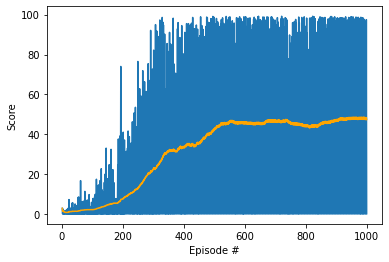

In [33]:
# compute rolling average
rolling_mean = np.copy(s)
ma = 100

for i in range(len(rolling_mean)):
    rolling_mean[i] = (float)(np.mean(s[max(0,i-ma):i+1]))
    

# display graph
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(s)+1), s)
plt.plot(np.arange(1, len(s)+1), rolling_mean, label='100 episodes moving average', color='orange')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()